 Here we are try our best to understand different statistical test that we can apply. 
 
 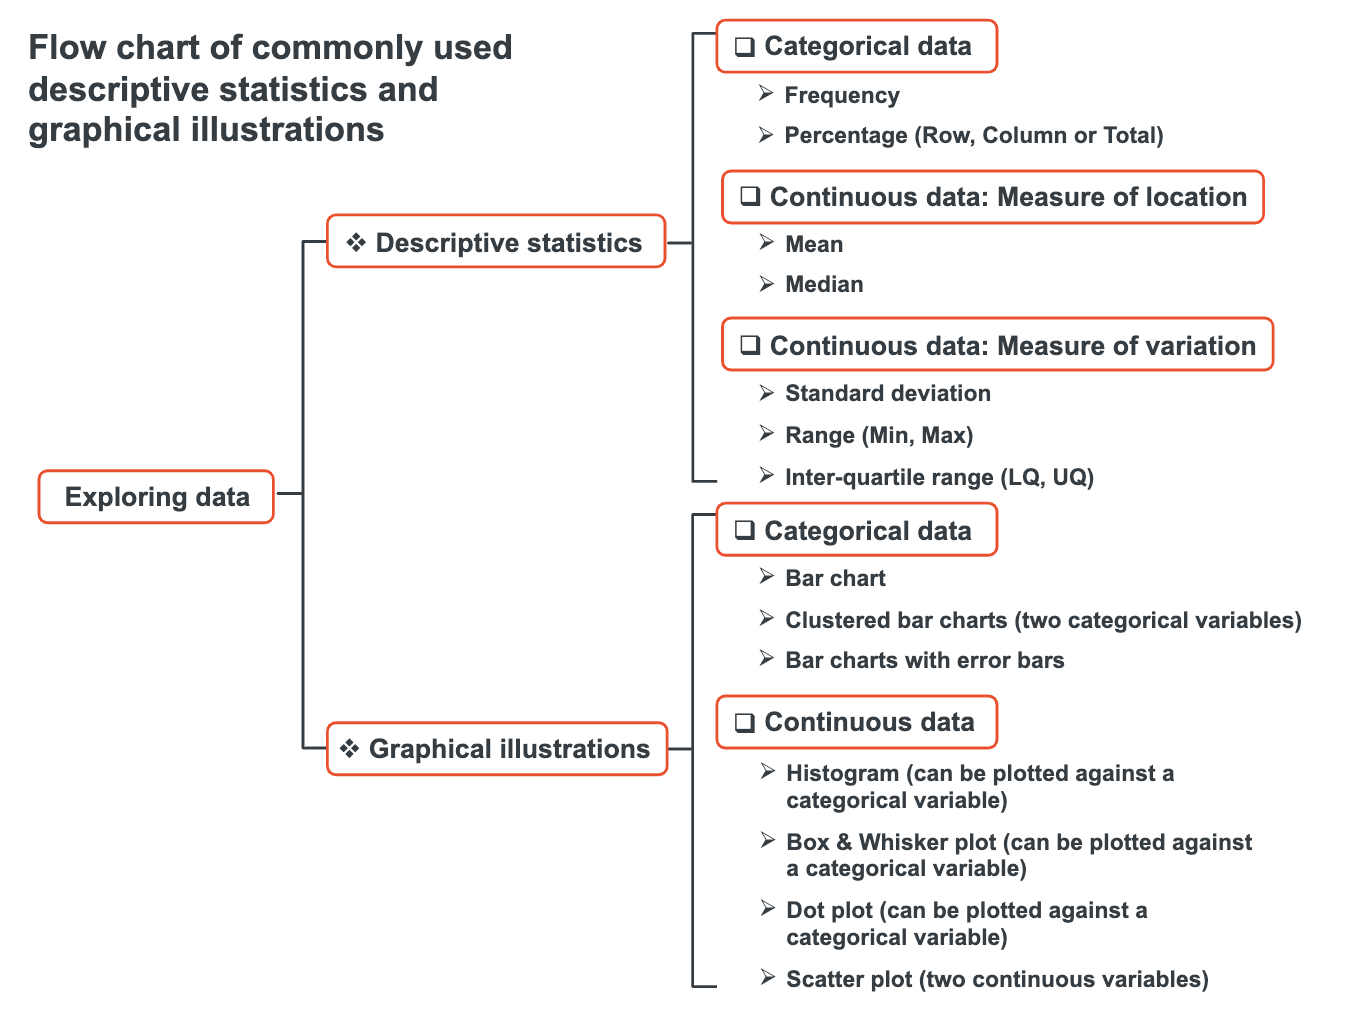
 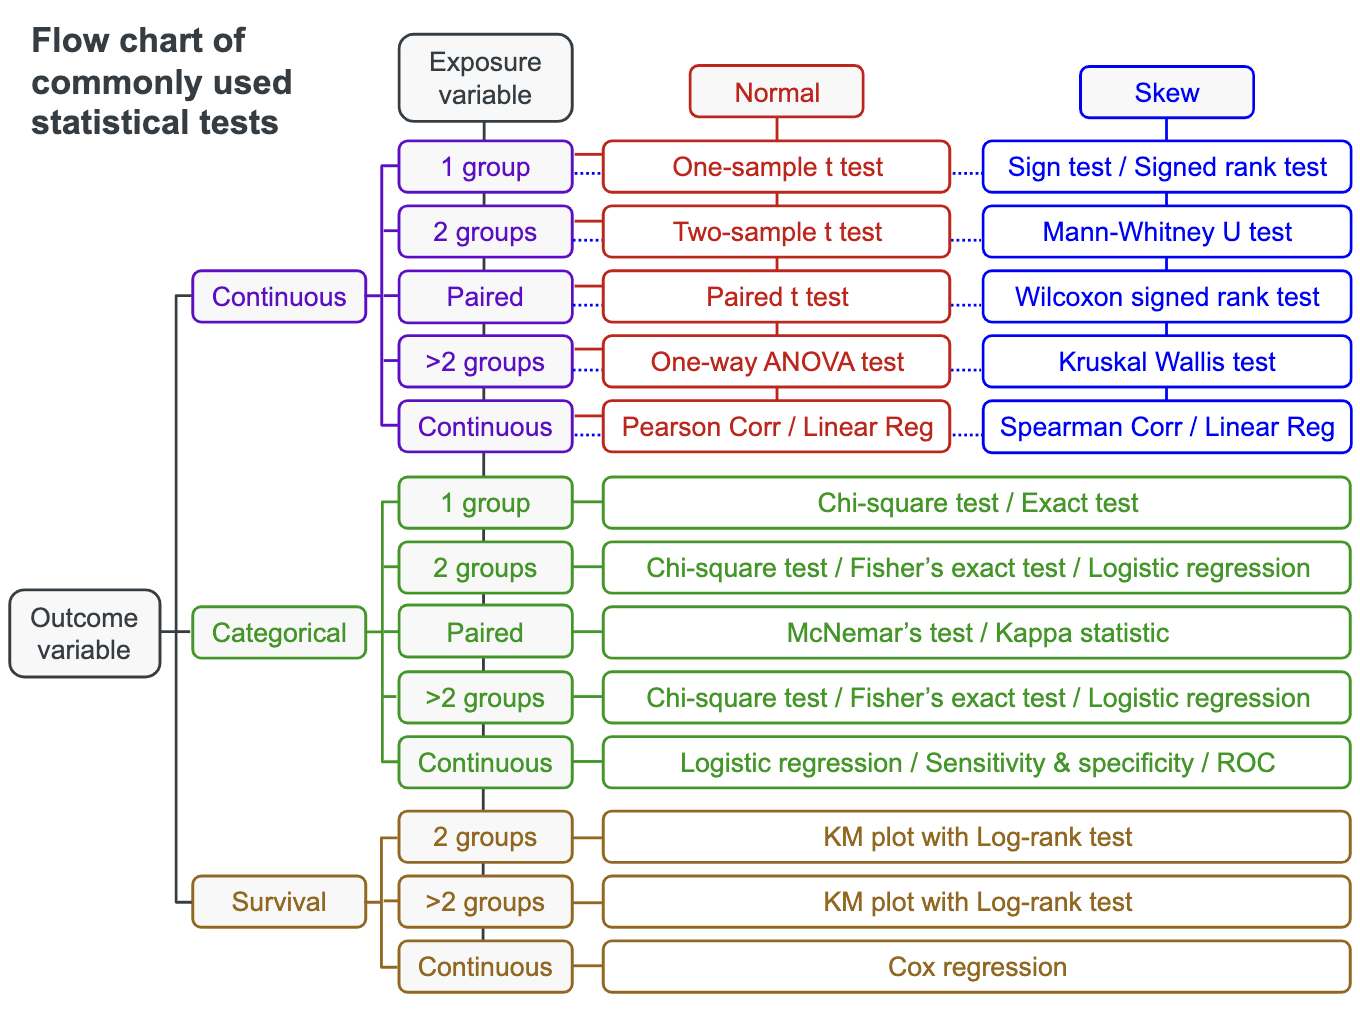
 
 ref:https://slideplayer.com/slide/6538273/

# Normality Test 
ref: https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Normality_Tests.pdf 

Normality test actually test to verify the data follows gaussian distribution, as we always assume that for parameteric testing data is normally distributed(mean=0, std=1). 
But, it is always good to verify in advance.
Normailty test is one of the main prequisite to any statistical testing especially for parameteric test.
There are 2 ways to do that either mathematically or grahically. However, graphically has advantage of providing a better understanding of the data. <br>
Distribution chart like __Frequency distribution, box-plot, stem-and-leaf plot, P-P (probability-probability ) plot, and Q-Q(Quantile -Quantile )__ plot are used for normality.
Different Normality test is as follows:
1. Kolmogorov-smirnov(K-S)test
2. Shapiro-Wilk test
3. Anderson-Darling test
4. Cramer-von Mises test
5. D'Agostino's K-squared test
6. Anscombe-Glynn kurtosis test
7. D'Agostino-Pearson omnibus test
8. Jarque-Bera test 


ref:- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/



Lets first we make one normally distributed data and not normally distributed data 

In [56]:
!pip install numpy matplotlib scipy 

In [4]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pylab as py
import scipy.stats as stats

Mean: 0.00302652089230478 and Standard Deviation: 1.00575691966835


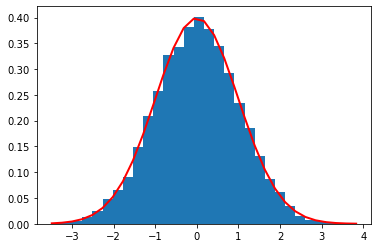

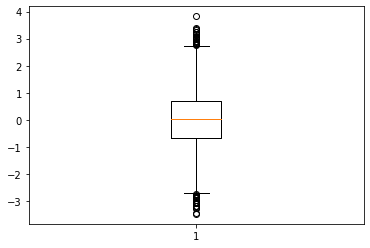

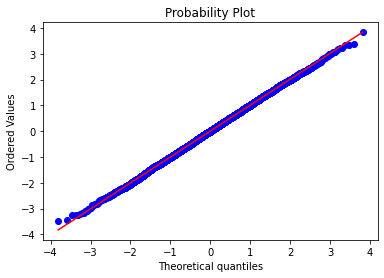

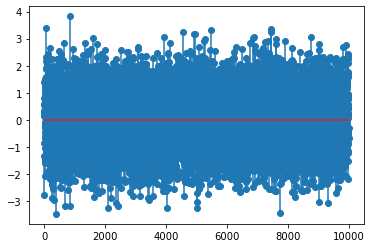

In [5]:
# generating normally distributed data we call it population
mean= 0 # as we know that normal distributed data have mean 0 and standard deviation as 1
std= 1 # standard deviation
sample_size=1000
normal_d= np.random.normal(mean,std, 10000)
# plotting the distribution
print('Mean: {} and Standard Deviation: {}'.format(np.mean(normal_d),np.std(normal_d)))
count, bins, ignored =plt.hist(normal_d,30, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *np.exp( - (bins - mean)**2 / (2 * std**2) ),linewidth=2, color='r') # this is the formula of normal distribution
plt.show()
# boxplot
plt.boxplot(normal_d)
plt.show()

# Q-Q plot
stats.probplot(normal_d, dist="norm", plot=py)
py.show()

# stem leaf plot
plt.stem(normal_d)
plt.show()

Mean: 0.4932368928180497 and Standard Deviation: 0.2896146192155614


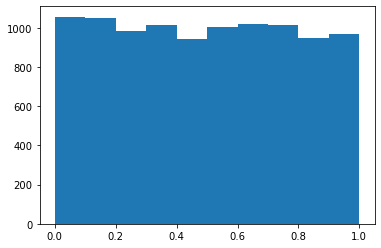

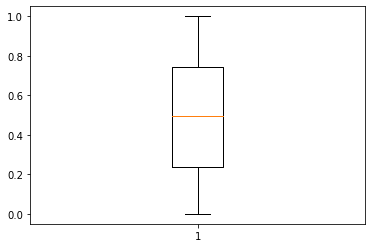

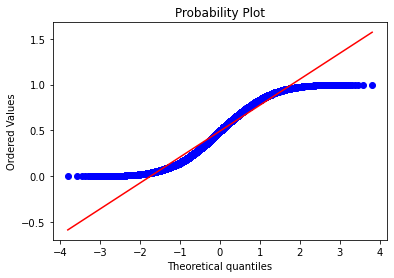

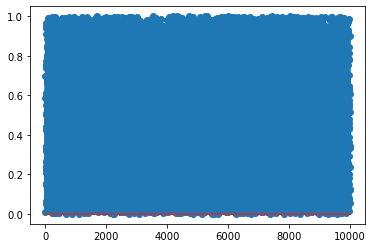

In [6]:
# not normaly distributed data 
not_normal_d= np.random.rand(10000)
print('Mean: {} and Standard Deviation: {}'.format(np.mean(not_normal_d),np.std(not_normal_d)))
plt.hist(not_normal_d)
plt.show()
plt.boxplot(not_normal_d)
plt.show()
# Q-Q plot
stats.probplot(not_normal_d, dist="norm", plot=py)
py.show()

# stem leaf plot
plt.stem(not_normal_d)
plt.show()

## Shapiro-wilk Test
 
 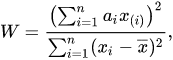
 
 The numerator is
proportional to the square of the best linear estimator of the standard deviation. The denominator is the sum of
squares of the observations about the sample mean. The closer W is to one, the more normal the sample is.
 
  __Shapiro-wilk Test verifies that how likely is the observed distribution is exactly normally distributed in the entire population?__
  
  __H0:__ The sample has a Normal Distribution.
  
  __H1:__ The same does not have a Normal Distribution.
  
  __reject the null hypothesis if p <0.05__
  
  __How it works ?__
  
  As shown in figure, it tries to overlap the normal distribution over sample data and tries to calculate the similarity percentage.
  
  Source: https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/
  
  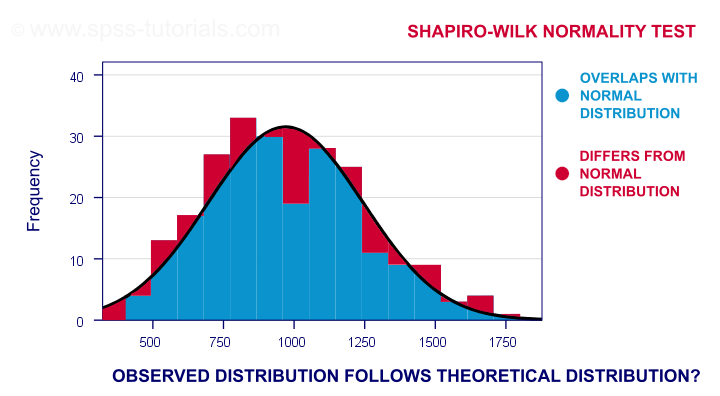!

In [36]:
# importing shapiro 
from scipy.stats import shapiro
sample_n= np.random.choice(normal_d,200)
w,p = shapiro(sample_n)
print('stat: {} and p :{}'.format(w,p))
if p>0.05:
    print('Failed to reject null hypothesis, Probably Normally distributed')
else:
    print('Reject null hypothesis, Probably not Normally distributed')

stat: 0.9952836036682129 and p :0.7906845808029175
Failed to reject null hypothesis, Probably Normally distributed


In [37]:
# not another sample from non-distributed population 
sample_nn=np.random.choice(not_normal_d,200)
w,p = shapiro(sample_nn)
print('m: {} and p :{}'.format(w,p))
if p>0.05:
    print('Failed to reject null hypothesis, Probably Normally distributed')
else:
    print('Reject null hypothesis, Probably not Normally distributed')

m: 0.9536771178245544 and p :4.339461611380102e-06
Reject null hypothesis, Probably not Normally distributed


## D'Agostino's K-squared test

Normality test based on the skewness and kurtosis coefficient. Normal distribution has skewness =0, kurtosis=0, and symmetrical.

  __H0:__ The sample has a Normal Distribution.
  
  __H1:__ The same does not have a Normal Distribution.
  
  __reject the null hypothesis if p <0.05__


In [41]:
#importing libraries
from scipy.stats import normaltest
stat, p = normaltest(sample_n)
print('stat: {} and p :{}'.format(stat,p))
if p>0.05:
    print('Failed to reject null hypothesis, Probably Normally distributed')
else:
    print('Reject null hypothesis, Probably not Normally distributed')

stat: 0.22728550765109315 and p :0.8925767685676883
Failed to reject null hypothesis, Probably Normally distributed


In [42]:
stat, p = normaltest(sample_nn)
print('stat: {} and p :{}'.format(stat,p))
if p>0.05:
    print('Failed to reject null hypothesis, Probably Normally distributed')
else:
    print('Reject null hypothesis, Probably not Normally distributed')

stat: 69.66634523338637 and p :7.449812551567826e-16
Reject null hypothesis, Probably not Normally distributed


## Anderson-Darling test
  __H0:__ The sample has a specified Distribution.
  
  __H1:__ The same does not have a specified Distribution.
  
  __reject the null hypothesis if p <0.05__
  
  The Anderson-Darling test (Stephens, 1974) is used to test if a sample of data came from a population with a specific distribution. It is a modification of the Kolmogorov-Smirnov (K-S) test and gives more weight to the tails than does the K-S test. The K-S test is distribution free in the sense that the critical values do not depend on the specific distribution being tested (note that this is true only for a fully specified distribution, i.e. the parameters are known). The Anderson-Darling test makes use of the specific distribution in calculating critical values. 
The Anderson-Darling test can be used to answer the following questions:
- Are the data from a normal distribution?
- Are the data from a log-normal distribution?
- Are the data from a Weibull distribution?
- Are the data from an exponential distribution?
- Are the data from a logistic distribution?

ref: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm

In [51]:
from scipy.stats import anderson
'''Critical values provided are for the following significance levels:
normal/exponenential
15%, 10%, 5%, 2.5%, 1%

logistic
25%, 10%, 5%, 2.5%, 1%, 0.5%

Gumbel
25%, 10%, 5%, 2.5%, 1% 
If the returned statistic is larger than these critical values then for the corresponding significance level, 
the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic 
is referred to as ‘A2’ in the references.'''

stat= anderson(sample_n,'norm') # other distribution are {‘norm’, ‘expon’, ‘logistic’, ‘gumbel’, ‘gumbel_l’, ‘gumbel_r’, ‘extreme1’}
print('stat:{}'.format(stat))
for i in range(len(stat.critical_values)):
    if stat.statistic< stat.critical_values[i]:
        print('Failed to reject null hypothesis(Probably normal distributed) at significance level {}'.format(stat.significance_level[i]))
    else:
        print('Reject null hypothesis(Probably not normal distributed) at significance level {}'.format(stat.significance_level[i]))
        

stat:AndersonResult(statistic=0.24922275717813136, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Failed to reject null hypothesis(Probably normal distributed) at significance level 15.0
Failed to reject null hypothesis(Probably normal distributed) at significance level 10.0
Failed to reject null hypothesis(Probably normal distributed) at significance level 5.0
Failed to reject null hypothesis(Probably normal distributed) at significance level 2.5
Failed to reject null hypothesis(Probably normal distributed) at significance level 1.0


In [52]:
stat= anderson(sample_nn,'norm') # other distribution are {‘norm’, ‘expon’, ‘logistic’, ‘gumbel’, ‘gumbel_l’, ‘gumbel_r’, ‘extreme1’}
print('stat:{}'.format(stat))
for i in range(len(stat.critical_values)):
    if stat.statistic< stat.critical_values[i]:
        print('Failed to reject null hypothesis(Probably normal distributed) at significance level {}'.format(stat.significance_level[i]))
    else:
        print('Reject null hypothesis(Probably not normal distributed) at significance level {}'.format(stat.significance_level[i]))

stat:AndersonResult(statistic=2.4251356149759715, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Reject null hypothesis(Probably not normal distributed) at significance level 15.0
Reject null hypothesis(Probably not normal distributed) at significance level 10.0
Reject null hypothesis(Probably not normal distributed) at significance level 5.0
Reject null hypothesis(Probably not normal distributed) at significance level 2.5
Reject null hypothesis(Probably not normal distributed) at significance level 1.0


# Correlation Tests
Verifying the relation between two samples. 
Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.  In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1.  A value of ± 1 indicates a perfect degree of association between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship. Usually, in statistics, we measure four types of correlations: 

ref: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/

1. Pearson’s Correlation Coefficient
2. Spearman’s Rank Correlation
3. Kendall’s Rank Correlation
4. Chi-Squared Test


## Pearson Correlation: 

__Range:(-1,+1)__

__Relation between two continuous variables (Including Dichotomous variables)__

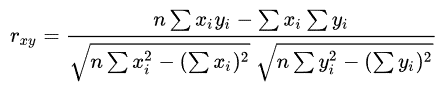

rxy = Pearson r correlation coefficient between x and y <br>
n = number of observations <br>
xi = value of x (for ith observation)<br>
yi = value of y (for ith observation) <br>

__Types of research questions a Pearson correlation can examine:__

Is there a statistically significant relationship between age, as measured in years, and height, measured in inches?

Is there a relationship between temperature, measured in degrees Fahrenheit, and ice cream sales, measured by income?

Is there a statistical association between IQ scores and depression?

__Assumptions:__<br>
__Independent of case:__ Cases should be independent to each other.<br>
__Linear relationship:__ Two variables should be linearly related to each other. This can be assessed with a scatterplot:plot
the value of variables on a scatter diagram, and check if the plot yields a relatively straight line.<br>
__Homoscedasticity:__ the residuals scatterplot should be roughly rectangular-shaped. Observations in each sample have the same variance. <br>
Observations in each sample are normally distributed.

__Hypothesis:__ <br>
__H0:__ the two samples are independent.<br>
__H1:__ there is a dependency between the samples.

In [85]:
# now taking two samples from the population and see what happens 
from scipy.stats import pearsonr
sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d, 300)

stat, p = pearsonr(sample_1,sample_2)
print('stat:{} and p :{}'.format(stat,p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably Independent')
else:
    print('Reject Null Hypothesis, Probably Dependent variable')
    

stat:-0.05537559839786663 and p :0.33914142218118964
Failed to reject null Hypothesis, Probably Independent


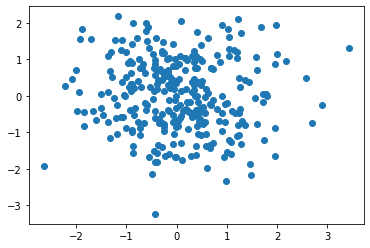

In [86]:
'''outcome should be independent , 
as they came from same distribution, 
it will be independent. so lets verify by 
ploting scatter plot '''
plt.scatter(sample_1, sample_2)
plt.show()

In [122]:
# lets verify it with linearly dependent variables 
from sklearn.datasets import make_regression
data1,data2= make_regression(n_samples=200, n_features=1, noise=20)
data1= data1.reshape(1,-1)[0]
stat, p = pearsonr(data1,data2)
print('stat:{} and p :{}'.format(stat,p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably Independent')
else:
    print('Reject Null Hypothesis, Probably Dependent variable')

stat:0.9738268669457155 and p :2.3322295389925292e-129
Reject Null Hypothesis, Probably Dependent variable


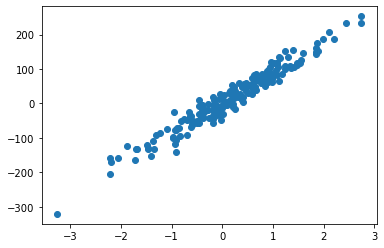

In [123]:
plt.scatter(data1, data2)
plt.show()

## Spearman's Rank Correlation

__Range: (-1,+1)__

The Spearman's rank-order correlation is the nonparametric version of the Pearson correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association __between two ranked variables__.<br>
This correlation determine the strength and direction of the monotonic relationship(whether linear or not) between two variables instead of strength and direction of the linear relationship between two variables as in pearsons correlations.<br>
_unlike Pearson’s correlation, there is no requirement of normality and hence it is a nonparametric statistic._<br>
__Monotonic Relationship__

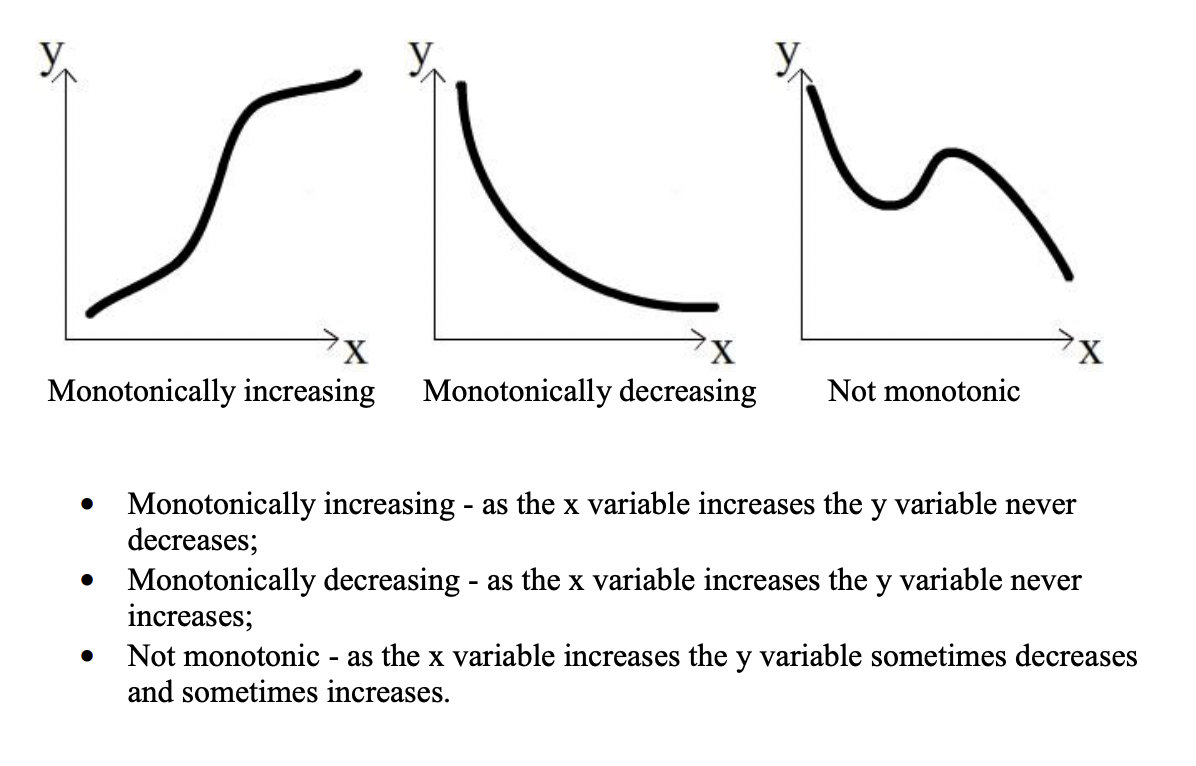

Formula for no tied ranks:<br>
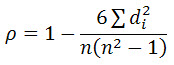

Formula for tied ranks:<br>
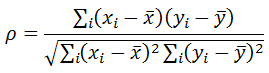<br>
__Assumptions:__
1. ordinal, interval or ratio data 
2. Observations in each sample can be ranked.
<br>

- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”




In [124]:
# now taking two samples from the population and see what happens 
from scipy.stats import spearmanr
sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d, 300)

stat, p = spearmanr(sample_1,sample_2)
print('stat:{} and p :{}'.format(stat,p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably Independent')
else:
    print('Reject Null Hypothesis, Probably Dependent variable')

stat:0.10027493681588862 and p :0.08292961741615221
Failed to reject null Hypothesis, Probably Independent


In [125]:
# lets verify it with linearly dependent variables 
from sklearn.datasets import make_regression
data1,data2= make_regression(n_samples=200, n_features=1, noise=20)
data1= data1.reshape(1,-1)[0]
stat, p = spearmanr(data1,data2)
print('stat:{} and p :{}'.format(stat,p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably Independent')
else:
    print('Reject Null Hypothesis, Probably Dependent variable')

stat:0.7468656716417911 and p :6.216655127709317e-37
Reject Null Hypothesis, Probably Dependent variable


## Kendall’s Rank Correlation
Kendall's rank correlation provides a distribution free test of independence and a measure of the strength of dependence between two variables.
Spearman's rank correlation is satisfactory for testing a null hypothesis of independence between two variables but it is difficult to interpret when the null hypothesis is rejected.
Kendall's rank correlation improves upon this by reflecting the strength of the dependence between the variables being compared.

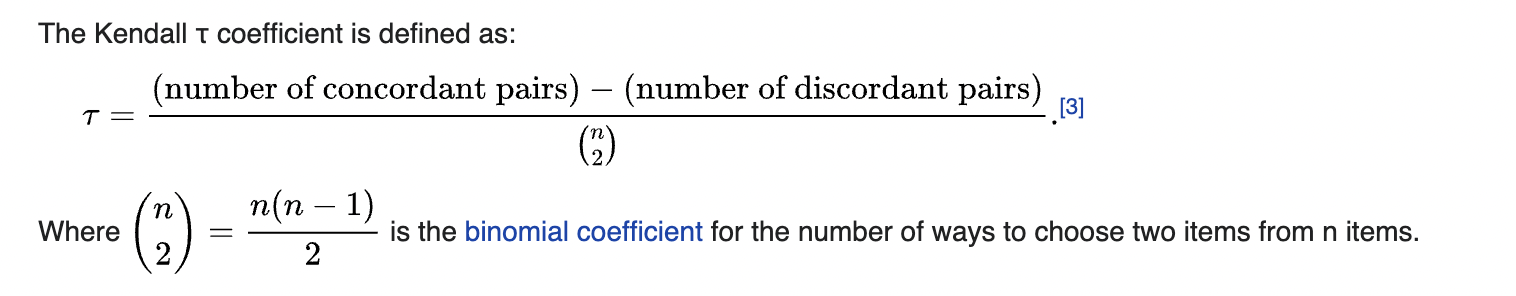

__Hypothesis:__<br>
__H0:__ samples are independent.<br>
__H1:__ dependency between the samples.<br>

In [130]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr
sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d, 300)

stat, p = kendalltau(sample_1,sample_2)
print('stat:{} and p :{}'.format(stat,p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably Independent')
else:
    print('Reject Null Hypothesis, Probably Dependent variable')

stat:0.008897213772244632 and p :0.8182529974809732
Failed to reject null Hypothesis, Probably Independent


In [131]:
# lets verify it with linearly dependent variables 
from sklearn.datasets import make_regression
data1,data2= make_regression(n_samples=200, n_features=1, noise=20)
data1= data1.reshape(1,-1)[0]
stat, p = kendalltau(data1,data2)
print('stat:{} and p :{}'.format(stat,p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably Independent')
else:
    print('Reject Null Hypothesis, Probably Dependent variable')

stat:0.8310552763819096 and p :2.1703227502816033e-68
Reject Null Hypothesis, Probably Dependent variable


##  Chi-squared Test
Correlations test between two categorical variables.
__Goodness-of-Fit:__ χ2 provides a way to test how well a sample of data matches the (known or assumed) characteristics of the larger population that the sample is intended to represent.

Must check : 
1. Two categorical variables.
2. Two or more categories (groups) for each variable.
3. Independence of observations.
4. There is no relationship between the subjects in each group.
5. The categorical variables are not "paired" in any way (e.g. pre-test/post-test observations).
6. Relatively large sample size.
7. Expected frequencies for each cell are at least 1.
8. Expected frequencies should be at least 5 for the majority (80%) of the cells.

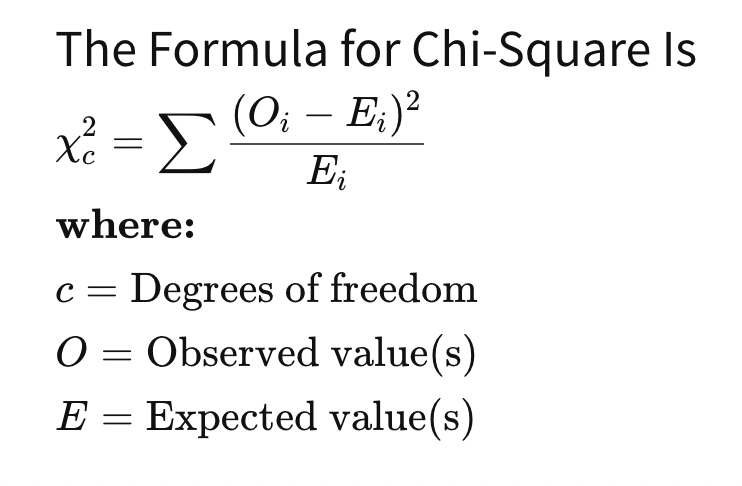

__Example :__<br>
- When considering student sex and course choice, a χ2 test for independence could be used. 
- We have bags of candy with five flavors in each bag. The bags should contain an equal number of pieces of each flavor.<br> The idea we'd like to test is that the proportions of the five flavors in each bag are the same.
- For a group of children’s sports teams, we want children with a lot of experience, some experience and no experience <br>shared evenly across the teams. Suppose we know that 20 percent of the players in the league have a lot of experience, 65 percent have some experience and 15 percent are new players with no experience.<br>The idea we'd like to test is that each team has the same proportion of children with a lot, some or no experience as the league as a whole.

ref: https://www.investopedia.com/terms/c/chi-square-statistic.asp

__Hypothesis:__<br>
__H0:__ Sample are independent.<br>
__H1:__ Samples are dependent.<br>


In [133]:
from scipy.stats import chi2_contingency
table = [[10, 30, 40,50,60,70],[1, 2,3,4,10,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably Independent')
else:
    print('Reject Null Hypothesis, Probably Dependent variable')

stat=7.908, p=0.161
Failed to reject null Hypothesis, Probably Independent


# Stationary Tests
Test to verify that time series data is stationary or not.
A stationary series data has the property of constant mean, variance and covariance over time.<br> 

__Example__: relationship between wages and house prices,exchange rates,  profits and dividends, and consumption and GDP. 

__Test to check stationary:__
- __ADF Test(Augmented Dickey Fuller)__
- __KPSS Test(Kwiatkowski-Phillips-Schmidt-Shin)__


In [161]:
!pip install statsmodels

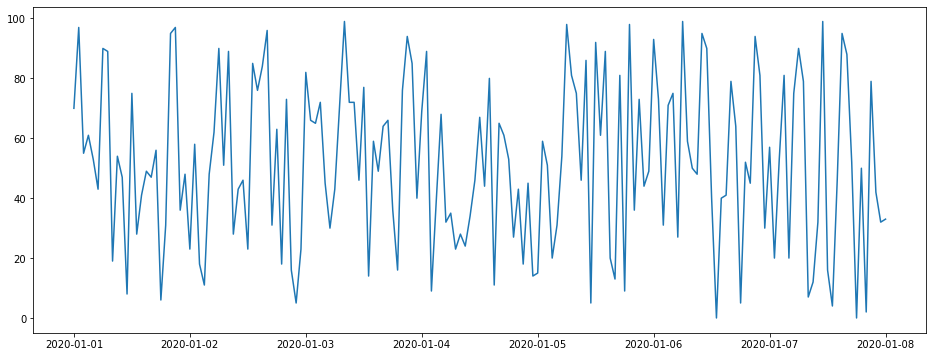

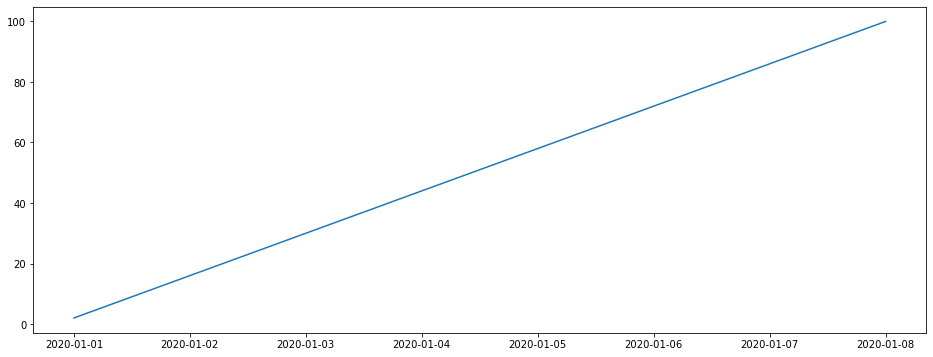

In [160]:
# creating time series data 
import pandas as pd
from datetime import datetime
from sklearn.datasets import make_regression


date_df =pd.DataFrame(pd.date_range(start='1/1/2020', end='1/08/2020', freq='H'),columns=['DateTime'])
# creating kind of stationary data
date_df['Data_sat']=np.random.randint(0,100,size=(len(date_df)))
date_df['Data_nsat']= np.linspace(2.0, 100.0, num=len(date_df))
# ploting time series data 
# creating stationary data
plt.figure(figsize=(16,6))
plt.plot(date_df['DateTime'],date_df['Data_sat'])
plt.show()
#creating non-stationary data 
plt.figure(figsize=(16,6))
plt.plot(date_df['DateTime'],date_df['Data_nsat'])
plt.show() 
#date_df['Data'].plot()

## ADF (Augmented Dickey Fuller) Test

__Hypothesis:__

__H0:__ a unit root is present (series is non-stationary).<br>
__H1:__ a unit root is not present (series is stationary).

A unit root (also called a unit root process or a difference stationary process) is a stochastic trend in a time series, sometimes called a “random walk with drift”; If a time series has a unit root, it shows a systematic pattern that is unpredictable.

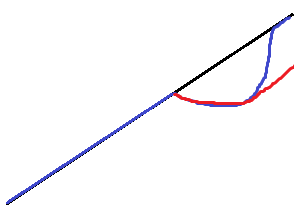

A possible unit root. The red line shows the drop in output and path of recovery if the time series has a unit root. 
Blue shows the recovery if there is no unit root and the series is trend-stationary.


In [166]:
# now lets test
from statsmodels.tsa.stattools import adfuller
#ref: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

stat, p, lags, obs, crit, t = adfuller(date_df['Data_sat'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('failed to reject null hypothesis, Unit root is present probably. Hence, non-stationary')
else:
    print('Rejecting null hypothesis, Unit root is not present most probably. Hence, stationary')


stat=-8.706, p=0.000
Rejecting null hypothesis, Unit root is not present most probably. Hence, stationary


In [165]:
stat, p, lags, obs, crit, t = adfuller(date_df['Data_nsat'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('failed to reject null hypothesis, Unit root is present probably. Hence, non-stationary')
else:
    print('Rejecting null hypothesis, Unit root is not present most probably. Hence, stationary')

stat=-0.168, p=0.942
failed to reject null hypothesis, Unit root is present probably. Hence, non-stationary


## Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test

The KPSS test is based on linear regression. It breaks up a series into three parts: a deterministic trend (βt), a random walk (rt), and a stationary error (εt), with the regression equation:<br>
xt = rt + βt + ε1 <br>
If the data is stationary, it will have a fixed element for an intercept or the series will be stationary around a fixed level (Wang, p.33). The test uses OLS find the equation, which differs slightly depending on whether you want to test for level stationarity or trend stationarity (Kocenda & Cerný). A simplified version, without the time trend component, is used to test level stationarity.
Data is normally log-transformed before running the KPSS test, to turn any exponential trends into linear ones.<br>
ref: https://www.statisticshowto.com/kpss-test/

Data is normally log-transformed before running the KPSS test, to turn any exponential trends into linear ones.

__Hypothesis:__

__H0:__ Time series data is non trend stationary. Stationary <br>
__H1:__ Time series is trend-stationary. Not Stationary

__A major difference between KPSS and ADF tests is the capability of the KPSS test to check for stationarity in the ‘presence of a deterministic trend’.__

In [183]:
from statsmodels.tsa.stattools import kpss

stat, p, n_lags, critical_values = kpss(date_df['Data_sat'])
print(f'KPSS Statistic: {stat}')
print(f'p-value: {p}')
print(f'num lags: {n_lags}')
print('Critial Values:')
for key, value in critical_values.items():
    print(f'   {key} : {value}')
if p > 0.05:
    print('failed to reject null hypothesis, Time series data is non trend stationary. Hence, stationary')
else:
    print('Rejecting null hypothesis, Time series is trend-stationary. Hence, non stationary')

KPSS Statistic: 0.08409792250459533
p-value: 0.1
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
failed to reject null hypothesis, Time series data is non trend stationary. Hence, stationary


In [192]:
stat, p, n_lags, critical_values  = kpss(date_df['Data_nsat'])
print(f'KPSS Statistic: {stat}')
print(f'p-value: {p}')
print(f'num lags: {n_lags}')
print('Critial Values:')
for key, value in critical_values.items():
    print(f'   {key} : {value}')
if p > 0.05:
    print('failed to reject null hypothesis, Time series data is non trend stationary. Hence, stationary')
else:
    print('Rejecting null hypothesis, Time series is trend-stationary. Hence, non stationary')
    
print('*IMPORTANT* In order to reject the null hypothesis, the test statistic should be greater than the provided critical values.\nIf it is in fact higher than the target critical value, then that should automatically reflect in a low p-value.**')

KPSS Statistic: 1.2357298198452846
p-value: 0.01
num lags: 14
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Rejecting null hypothesis, Time series is trend-stationary. Hence, non stationary
*IMPORTANT* In order to reject the null hypothesis, the test statistic should be greater than the provided critical values.
If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value.**


5

# Parametric Statistical Hypothesis Tests

__Parametric__ : Assume specific distribution(Mean) <br>
__Non Parametric__: Do not assume specific distribution(Median) (Also known as distribution free test)

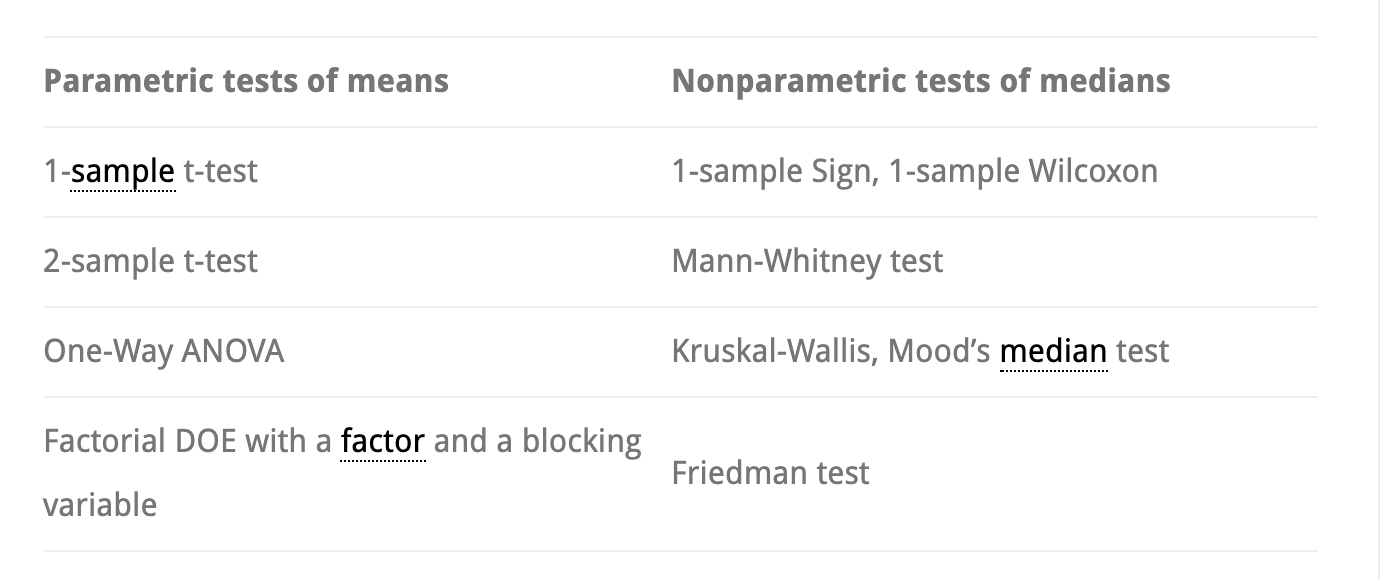

Advantage Parameteric test: 
- Provide trustworthy results with distribution are skewed and non gaussian.
- Have greator statistical power.

Advantage of Non- Paramteric test:
- None Parameteric access median which can be sometime usefull in some study areas.
- Valid when our samples size is small and data is not normally distributed. 
- Can analyze Ordinal data, ranked data, and outliers


## Student t-test

Tells about how significant the differences between groups are.
- __An Independent Samples__ t-test compares the means for two groups.
- __A Paired sample t-test__ compares means from the same group at different times (say, one year apart).
- __A One sample t-test__ tests the mean of a single group against a known mean.

__Example__:
- Knee MRI costs at two different hospitals,
- Two tests on the same person before and after training,
- Two blood pressure measurements on the same person using different equipment.

__Hypothesis:__<br>
__H0__: The means of the sample are equal. <br>
__H1__: The means of the samples are unequal.<br>


### An Independent Samples

In [205]:
from scipy.stats import ttest_ind # Calculate the T-test for the means of two independent samples of scores.
#scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')

normal_d= np.random.normal(0,1, 10000)

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d, 300)

stat, p = ttest_ind(sample_1,sample_2)
print('stat:{} and p :{}'.format(stat,p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably same distribution')
else:
    print('Reject Null Hypothesis, Probably different distribution')

stat:0.9738533110946329 and p :0.33052313682372425
Failed to reject null Hypothesis, Probably same distribution


In [211]:
normal_d1= np.random.normal(1,1,10000) # trying to change the mean and standard deviation in here and verify the result.

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d1, 300) # taking sample from other distribution

stat, p = ttest_ind(sample_1,sample_2)
print('stat:{} and p :{}'.format(stat,p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably same distribution')
else:
    print('Reject Null Hypothesis, Probably different distribution')

stat:-12.736827098165387 and p :4.7625581498620064e-33
Reject Null Hypothesis, Probably different distribution


### Paired Student t-test
Means from the same group at different times (say, one year apart).

In [214]:
from scipy.stats import ttest_rel
normal_d= np.random.normal(0,1, 10000)

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d, 300)

stat, p = ttest_rel(sample_1,sample_2)
print('stat:{} and p :{}'.format(stat,p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably same distribution')
else:
    print('Reject Null Hypothesis, Probably different distribution')

stat:0.6934179375535032 and p :0.4885856083276161
Failed to reject null Hypothesis, Probably same distribution


In [213]:
normal_d1= np.random.normal(1,1,10000) # trying to change the mean and standard deviation in here and verify the result.

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d1, 300) # taking sample from other distribution

stat, p = ttest_rel(sample_1,sample_2)
print('stat:{} and p :{}'.format(stat,p))
if p >0.05:
    print('Failed to reject null Hypothesis, Probably same distribution')
else:
    print('Reject Null Hypothesis, Probably different distribution')

stat:-12.70991653581204 and p :6.961393496501598e-30
Reject Null Hypothesis, Probably different distribution


### Analysis of Variance Test (ANOVA)

- Analysis of variance, or ANOVA, is a statistical method that separates observed variance data into different components to use for additional tests.
- A one-way ANOVA is used for three or more groups of data, to gain information about the relationship between the dependent and independent variables.
- __If no true variance exists between the groups, the ANOVA's F-ratio should equal close to 1.__

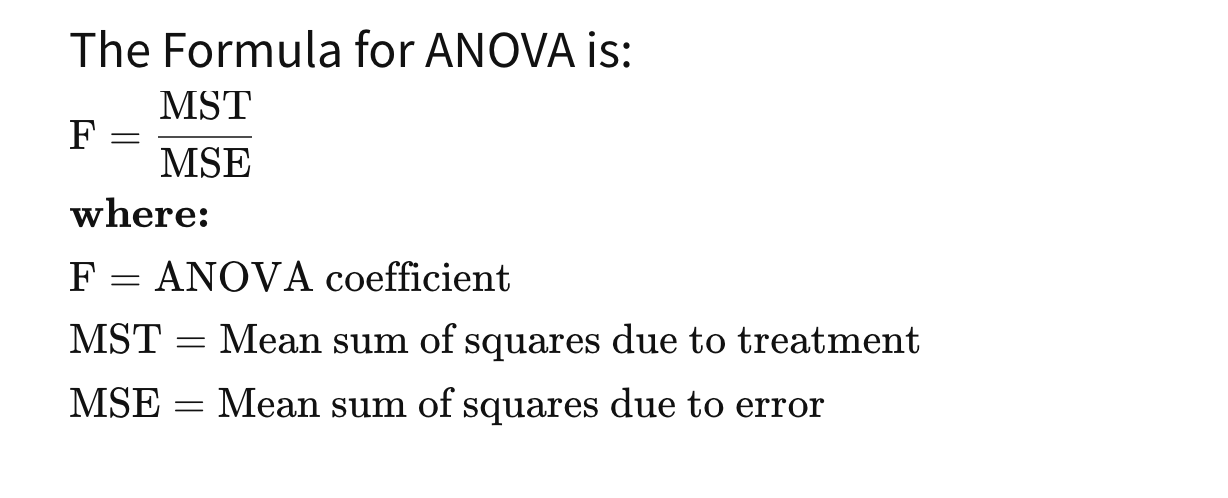


__Hypothesis:__<br>
__H0__: The means of the samples are equal.<br>
__H1__: One or more of the means of the samples are unequal.
 <br>OR <br>
__H0:__ μ1 = μ2 = μ3 ... = μk. <br>
__H1:__ Means are not all equal.

In [218]:
from scipy.stats import f_oneway
sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d, 300) # taking sample from same distribution
sample_3= np.random.choice(normal_d, 300)
stat, p = f_oneway(sample_1, sample_2, sample_3)
print(f'stat: {stat}, p: {p}')
if p >0.05:
    print('Failed to reject null Hypothesis, means of the sample are equal')
else:
    print('Reject Null Hypothesis, one of more of the means are unequal')

stat: 1.3403870680902263, p: 0.2622680754774528
Failed to reject null Hypothesis, means of the sample are equal


In [219]:
sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d1, 300) # taking sample from other distribution
sample_3= np.random.choice(normal_d, 300)
stat, p = f_oneway(sample_1, sample_2, sample_3)
print(f'stat: {stat}, p: {p}')
if p >0.05:
    print('Failed to reject null Hypothesis, means of the sample are equal')
else:
    print('Reject Null Hypothesis, one of more of the means are unequal')

stat: 95.0503278550392, p: 3.6343301573678214e-38
Reject Null Hypothesis, one of more of the means are unequal


## Not Parametric Statistical Hypothesis Tests
- Wilcoxon signed rank test
- Mann- Whitney test
- Kruskal- Wallis 
- Friedman test


### Wilcoxon signed rank test
Whether the distributions of the __two paired samples__ are equal or not.<br>
__Hypothesis__:<br>
__H0__: The distributions of both samples are equal.<br>
__H1__: The distributions of both the samples are not equal.<br>

In [16]:
from scipy.stats import wilcoxon
normal_d1= np.random.normal(1,1,10000)
normal_d= np.random.normal(0,1,10000)

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d, 300) # taking sample from same distribution
stat, p = wilcoxon(sample_1, sample_2)
print(f'stat: {stat}, p: {p}')
if p >0.05:
    print('Failed to reject null Hypothesis, The distributions of both samples are equal.')
else:
    print('Reject Null Hypothesis, The distributions of both the samples are not equal.')

stat: 20326.0, p: 0.1347592623222457
Failed to reject null Hypothesis, The distributions of both samples are equal.


In [12]:

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d1, 300) # taking sample from different distribution
stat, p = wilcoxon(sample_1, sample_2)
print(f'stat: {stat}, p: {p}')
if p >0.05:
    print('Failed to reject null Hypothesis, The distributions of both samples are equal.')
else:
    print('Reject Null Hypothesis, The distributions of both the samples are not equal.')

stat: 7318.0, p: 3.453236961345614e-24
Reject Null Hypothesis, The distributions of both the samples are not equal.


### Man-Whitney U Test

Test the distribution of __two indepedent samples__ are equal or not. 

__Hypothesis__:<br>
__H0__: The distributions of both samples are equal.<br>
__H1__: The distributions of both the samples are not equal.<br>

In [14]:
from scipy.stats import mannwhitneyu
normal_d1= np.random.normal(1,1,10000)
normal_d= np.random.normal(0,1,10000)

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d, 300) # taking sample from same distribution
stat, p = mannwhitneyu(sample_1, sample_2)
print(f'stat: {stat}, p: {p}')
if p >0.05:
    print('Failed to reject null Hypothesis, The distributions of both samples are equal.')
else:
    print('Reject Null Hypothesis, The distributions of both the samples are not equal.')

stat: 42442.5, p: 0.11422165962085279
Failed to reject null Hypothesis, The distributions of both samples are equal.


In [15]:

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d1, 300) # taking sample from different distribution
stat, p = mannwhitneyu(sample_1, sample_2)
print(f'stat: {stat}, p: {p}')
if p >0.05:
    print('Failed to reject null Hypothesis, The distributions of both samples are equal.')
else:
    print('Reject Null Hypothesis, The distributions of both the samples are not equal.')

stat: 22333.0, p: 6.57745542353937e-27
Reject Null Hypothesis, The distributions of both the samples are not equal.


### Kruskal-Wallis H Test

Test for __two or more independent samples__ are equal or not.

__Hypothesis__:<br>
__H0__: The distributions of both samples are equal.<br>
__H1__: The distributions of both the samples are not equal.<br>

In [17]:
from scipy.stats import kruskal
normal_d1= np.random.normal(1,1,10000)
normal_d= np.random.normal(0,1,10000)

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d, 300) # taking sample from same distribution
stat, p = kruskal(sample_1, sample_2)
print(f'stat: {stat}, p: {p}')
if p >0.05:
    print('Failed to reject null Hypothesis, The distributions of both samples are equal.')
else:
    print('Reject Null Hypothesis, The distributions of both the samples are not equal.')

stat: 1.0003890466623713, p: 0.3172163882686026
Failed to reject null Hypothesis, The distributions of both samples are equal.


In [20]:

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d1, 300) # taking sample from different distribution
stat, p = kruskal(sample_1, sample_2)
print(f'stat: {stat}, p: {p}')
if p >0.05:
    print('Failed to reject null Hypothesis, The distributions of both samples are equal.')
else:
    print('Reject Null Hypothesis, The distributions of both the samples are not equal.')

stat: 145.80245569005714, p: 1.433928313599605e-33
Reject Null Hypothesis, The distributions of both the samples are not equal.


### FriedMan Test

Test for distribution of  __two or more paired samples__ are equal or not.

__Hypothesis__:<br>
__H0__: The distributions of  samples are equal.<br>
__H1__: The distributions of one or more samples are not equal.<br>

In [24]:
from scipy.stats import friedmanchisquare
normal_d1= np.random.normal(1,1,10000)
normal_d= np.random.normal(0,1,10000)

sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d, 300) # taking sample from same distribution
sample_3= np.random.choice(normal_d, 300)
stat, p = friedmanchisquare(sample_1, sample_2, sample_3)
print(f'stat: {stat}, p: {p}')
if p >0.05:
    print('Failed to reject null Hypothesis, The distributions of  samples are equal.')
else:
    print('Reject Null Hypothesis, The distributions of one or more samples are not equal')

stat: 0.42000000000007276, p: 0.8105842459701577
Failed to reject null Hypothesis, The distributions of  samples are equal.


In [25]:
sample_1= np.random.choice(normal_d, 300)
sample_2= np.random.choice(normal_d1, 300) # taking sample from different distribution
sample_3= np.random.choice(normal_d, 300)

stat, p = friedmanchisquare(sample_1, sample_2, sample_3)
print(f'stat: {stat}, p: {p}')
if p >0.05:
    print('Failed to reject null Hypothesis, The distributions of  samples are equal.')
else:
    print('Reject Null Hypothesis, The distributions of one or more samples are not equal')

stat: 141.48666666666713, p: 1.8904304405836712e-31
Reject Null Hypothesis, The distributions of one or more samples are not equal
